In [ ]:
from diffusers import DiffusionPipeline
import torch

pipeline = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16).to("cuda")
pipeline.load_lora_weights("ostris/ikea-instructions-lora-sdxl", weight_name="ikea_instructions_xl_v1_5.safetensors", adapter_name="ikea")
pipeline.load_lora_weights("lordjia/by-feng-zikai", weight_name="fengzikai_v1.0_XL.safetensors", adapter_name="feng")

In [2]:
import torch
from diffusers import StableDiffusionXLPipeline
from diffusers.utils import load_image, make_image_grid
init_image = load_image("emoji/shit/001.png")
#mask_image = load_image("emoji/mask_shit.png")

lora_path = "lora-trained-xl_emoji_angry_dyxa"
pipeline = StableDiffusionXLPipeline.from_pretrained("stabilityai/stable-diffusion-xl-base-1.0")

pipeline.to(device="cuda", dtype=torch.float16)



pipeline.load_lora_weights("lora-trained-xl_emoji_angry_dyxa", adapter_name="ikea")
pipeline.load_lora_weights("lora-trained-xl_emoji_shit_sks", adapter_name="feng")




Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

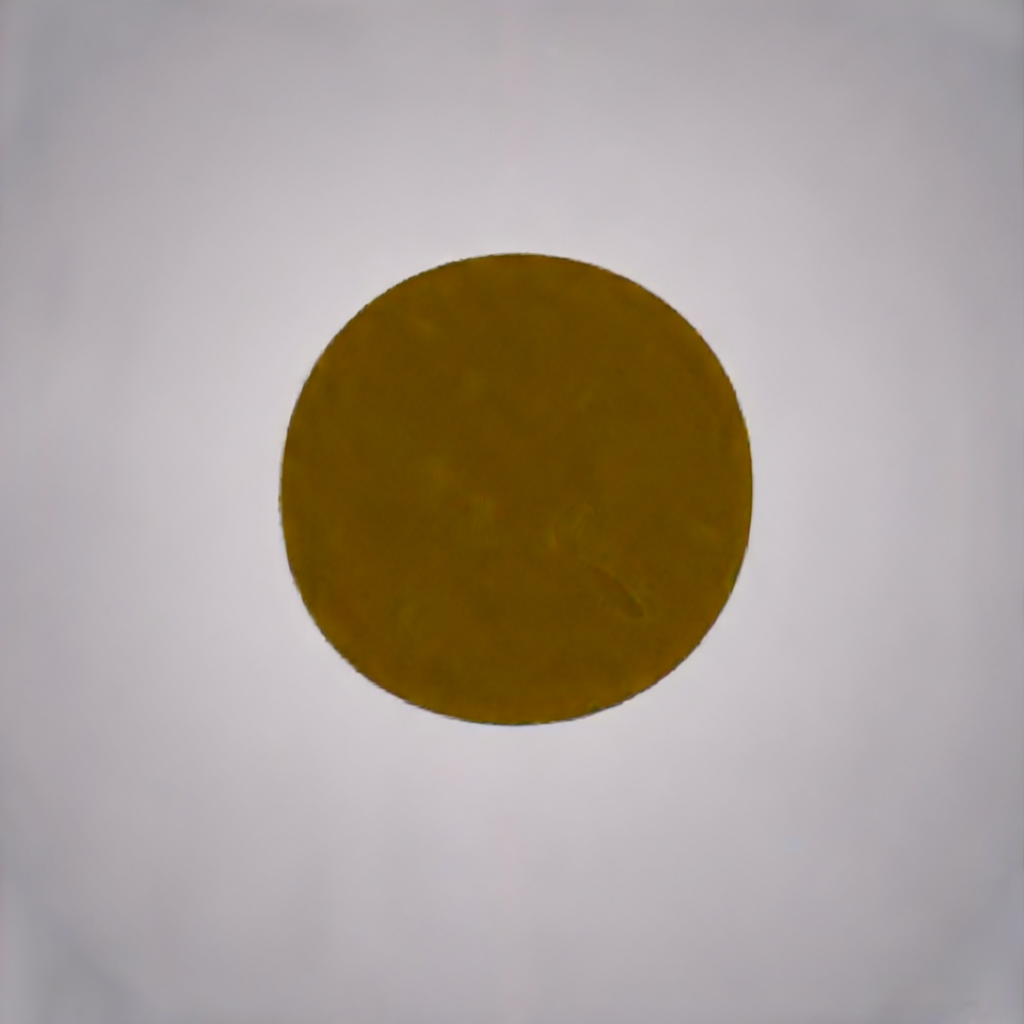

In [4]:
pipeline.set_adapters(["ikea", "feng"], adapter_weights=[0.8, 0.8])

generator = torch.manual_seed(0)
prompt = "a sks emoji with dyxa face emoji, high quality"
image = pipeline(prompt, generator=generator, cross_attention_kwargs={"scale": 1.0}).images[0]
image

In [6]:
for i in range(10):
    image = pipeline(prompt, generator=generator, cross_attention_kwargs={"scale": 1.0}).images[0]
    image.save(f"out{i}.png")

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]